In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [2]:
import re

In [67]:
data_path = r'../data/review_data.csv'

In [68]:
data = pd.read_csv(data_path)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  689 non-null    object
 1   rating  689 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.9+ KB


In [9]:
pd.set_option('display.max_colwidth', None)

## 1. Cleaning
#### Issue:
1. Upper case
2. Random double period (..)
3. Emoticon
4. all of punctuations
5. Number
6. Extra spaces

In [70]:
def text_cleaning(text):
    result = text.lower()
    result = result.replace('-', ' ')
    result = result.replace('+', ' ')
    result = result.replace('..', ' ')
    result = result.replace('.', ' ')
    result = result.replace(',', ' ')
    result = result.replace('\n', ' ')
    result = re.findall('[a-z\s]', result, flags=re.UNICODE) # remove emoticon
    result = "".join(result)
    final = " ".join(result.split())
    
    return final

In [71]:
data['cleaned_review'] = data.review.apply(lambda r: text_cleaning(r))

In [42]:
data.sample(frac=.1).head(50)

,review,rating,cleaned_review
303,Rasaya itu loh enak banget pengen coba lagi dan lagi,5,rasaya itu loh enak banget pengen coba lagi dan lagi
606,"Kertasnya tipis ya, gampang sobek, emang sih minyak di dahi aku banyak tapi bahkan cuma di tap tap ringan aja dia gampang sobek huhu. Daya serapnya lumayan, atau karena daya serap nya super bagus jadi malah cepet sobek gtau juga sih",4,kertasnya tipis ya gampang sobek emang sih minyak di dahi aku banyak tapi bahkan cuma di tap tap ringan aja dia gampang sobek huhu daya serapnya lumayan atau karena daya serap nya super bagus jadi malah cepet sobek gtau juga sih
607,"Nyerep minyak dengan baik, tp sayang nya terlalu tipis jd boros bgt ganti-ganti kertas terus. Isi nya banyak ko muraah juga.",4,nyerep minyak dengan baik tp sayang nya terlalu tipis jd boros bgt ganti ganti kertas terus isi nya banyak ko muraah juga
113,"Kurang suka dengan varian satu ini, rasa salted egg nya kurang berasa..",2,kurang suka dengan varian satu ini rasa salted egg nya kurang berasa
86,"Idenya menarik banget dan pertama kali tertarik banget buat cobain, tapi setelah tau rasanya maaf kurang cocok. Tipe mie keriting buat aku kurang sesuai sama identitas Indomie, kl Indomie yah mie nya yang kaya Indomie goreng gitu yg paling bener. Rasa salted egg nya juga aneh dan baunya juga.\nTeksture mie 1/5\nRasa salted egg 3/5\nVisual dan bau pertama kali 1/5",2,idenya menarik banget dan pertama kali tertarik banget buat cobain tapi setelah tau rasanya maaf kurang cocok tipe mie keriting buat aku kurang sesuai sama identitas indomie kl indomie yah mie nya yang kaya indomie goreng gitu yg paling bener rasa salted egg nya juga aneh dan baunya juga teksture mie rasa salted egg visual dan bau pertama kali
214,"Awalnya tertarik ingin mencoba tetapi setelah mencoba kowq biasa saja ya, tidak sesuai ekspektasi. Bau amisnya tidak suka dan saya lebih prefer snack kentang rasa salted egg yg ada di mini market dibanding mie instant ini.. -_-",3,awalnya tertarik ingin mencoba tetapi setelah mencoba kowq biasa saja ya tidak sesuai ekspektasi bau amisnya tidak suka dan saya lebih prefer snack kentang rasa salted egg yg ada di mini market dibanding mie instant ini
57,"awalnya beli karena penasaran dengan rasanya, lalu karena sedang trading juga pada saat itu, bahkan sampai harus pesan PO dari luar negri, ternyata begitu coba buat, tekstur mie nya sih kurang lebih sama ya seperti indomie lain, tetapi bumbunya ini baunya menyengat dan rasanya pun kurang cocok di lidah Saya, Saya kurang paham ini Saya yang salah cara bikin atau memang rasanya saja yang kurang cocok untuk Saya.",2,awalnya beli karena penasaran dengan rasanya lalu karena sedang trading juga pada saat itu bahkan sampai harus pesan po dari luar negri ternyata begitu coba buat tekstur mie nya sih kurang lebih sama ya seperti indomie lain tetapi bumbunya ini baunya menyengat dan rasanya pun kurang cocok di lidah saya saya kurang paham ini saya yang salah cara bikin atau memang rasanya saja yang kurang cocok untuk saya
2,"Waktu pertama melihat produknya, saya cukup excited karena saya suka sekali dengan produk berbau 'salted egg'. Ternyata Indomie varian ini tidak sesuai dengan ekspetasi saya. Perpaduan tekstur mie dan saus salted egg ternyata agak 'menjijikkan'. Sama sekali tidak cocok.",1,waktu pertama melihat produknya saya cukup excited karena saya suka sekali dengan produk berbau salted egg ternyata indomie varian ini tidak sesuai dengan ekspetasi saya perpaduan tekstur mie dan saus salted egg ternyata agak menjijikkan sama sekali tidak cocok
388,Aku suka mie ini berasa ada rasa telor asin nya ke sukaanbku banget ini,5,aku suka mie ini berasa ada rasa telor asin nya ke sukaanbku banget ini
237,rasanya enak namun baunya kurang enak . mungkin jika baunya bisa dihilangkan maka rasanya akan sangat enak,3,rasanya enak namun baunya kurang enak mungkin jika baunya bisa dihilangkan maka rasanya akan sangat enak


## 2. Remove Stopword and brand name

In [2]:
# stopwords file
stopword_path = r'../data/stopword_indonesia.txt'

In [73]:
from nltk.corpus import stopwords

indo_stopword =  set(stopwords.words('indonesian'))

In [37]:
indo_stopword

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [13]:
len(indo_stopword)

757

In [4]:
with open(stopword_path) as f:
    teks = f.readlines()
f.close()

In [6]:
stopwords_indo = [x.replace('\n', '') for x in teks]

In [7]:
stopwords_indo

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [15]:
len(stopwords_indo)

758

In [17]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

In [76]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

In [44]:
# pake ini aja
stopwords

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'tidak',
 'ini',
 'karena',
 'kepada',
 'oleh',
 'saat',
 'harus',
 'sementara',
 'setelah',
 'belum',
 'kami',
 'sekitar',
 'bagi',
 'serta',
 'di',
 'dari',
 'telah',
 'sebagai',
 'masih',
 'hal',
 'ketika',
 'adalah',
 'itu',
 'dalam',
 'bisa',
 'bahwa',
 'atau',
 'hanya',
 'kita',
 'dengan',
 'akan',
 'juga',
 'ada',
 'mereka',
 'sudah',
 'saya',
 'terhadap',
 'secara',
 'agar',
 'lain',
 'anda',
 'begitu',
 'mengapa',
 'kenapa',
 'yaitu',
 'yakni',
 'daripada',
 'itulah',
 'lagi',
 'maka',
 'tentang',
 'demi',
 'dimana',
 'kemana',
 'pula',
 'sambil',
 'sebelum',
 'sesudah',
 'supaya',
 'guna',
 'kah',
 'pun',
 'sampai',
 'sedangkan',
 'selagi',
 'sementara',
 'tetapi',
 'apakah',
 'kecuali',
 'sebab',
 'selain',
 'seolah',
 'seraya',
 'seterusnya',
 'tanpa',
 'agak',
 'boleh',
 'dapat',
 'dsb',
 'dst',
 'dll',
 'dahulu

#### words to eliminate:
1. mie, danone, indomie, aqua 

In [23]:
len(stopwords)

126

In [77]:
other_words = ['mie', 'danone', 'indomie', 'aqua', 'salted', 'egg', 'aja', 'gak']

In [78]:
all_stopwords = stopwords_indo + stopwords
dictionary_all = ArrayDictionary(all_stopwords)
stopword_remover = StopWordRemover(dictionary_all)

In [79]:
len(all_stopwords)

884

In [92]:
# Use NLTK stopword list

dictionary_all = ArrayDictionary(indo_stopword)
stopword_remover = StopWordRemover(dictionary_all)

In [102]:
kalimat = 'yang ini adalah ini kumis ini ini kuncing ini ini'

In [103]:
stopword_remover.remove(kalimat)

'kumis ini ini kuncing ini ini'

## Ahhhh, sastrawi is so weirdd

In [21]:
len(all_stopwords)

884

In [19]:
type(all_stopwords)

list

In [104]:
cth = data.loc[685,'cleaned_review']
cth

'harga lebih murah daripada yang bukan kertas ya secara juga ini kertas jd kalau pakai harus pelan pelan supaya ga sobek untuk nyerap minyaknya oke sih kalau muka gak berminyak banget boleh lah pake yang ini aja'

In [105]:
stopword_remover.remove(cth)

'harga murah kertas ya juga kertas jd pakai pelan pelan ga sobek nyerap minyaknya oke sih muka gak berminyak banget lah pake yang ini aja'

### This is using the sastrawi, but I think it has some issue, so I make my own stopwords remover

In [106]:
# Removing stopwords
data['review_no_stopword'] = data.cleaned_review.apply(lambda r: stopword_remover.remove(r))

In [107]:
data.sample(frac=.1).head(50)

,review,rating,cleaned_review,review_no_stopword
408,"Sudah pernah coba yang vanilla pandan, tapi kurang suka sama rasaya, walaupu ada teman yang merekomendasikan minuman ini. Sekarang justru penasaran sama duavarian rasa lain, tapi rada ragu kalau beli. Takut nggak sesuai lagi sama lidahku.",2,sudah pernah coba yang vanilla pandan tapi kurang suka sama rasaya walaupu ada teman yang merekomendasikan minuman ini sekarang justru penasaran sama duavarian rasa lain tapi rada ragu kalau beli takut nggak sesuai lagi sama lidahku,pernah coba vanilla pandan kurang suka rasaya walaupu teman merekomendasikan minuman sekarang penasaran duavarian lain rada ragu beli takut nggak sesuai sama lidahku
670,Harga relatif terjangkau dibandingkan competitor. Mampu menyerap minyak walaupun setelah beberapa kali pemakaian. jenis kertas minyaknya ringan jd somehow suka beterbangan saat dibuka kemasannya. ukuran relatif besar terkadang tidak muat di kantong tas.,4,harga relatif terjangkau dibandingkan competitor mampu menyerap minyak walaupun setelah beberapa kali pemakaian jenis kertas minyaknya ringan jd somehow suka beterbangan saat dibuka kemasannya ukuran relatif besar terkadang tidak muat di kantong tas,harga relatif terjangkau dibandingkan competitor menyerap minyak setelah kali pemakaian jenis kertas minyaknya ringan jd somehow suka beterbangan dibuka kemasannya ukuran relatif terkadang muat kantong tas
2,"Waktu pertama melihat produknya, saya cukup excited karena saya suka sekali dengan produk berbau 'salted egg'. Ternyata Indomie varian ini tidak sesuai dengan ekspetasi saya. Perpaduan tekstur mie dan saus salted egg ternyata agak 'menjijikkan'. Sama sekali tidak cocok.",1,waktu pertama melihat produknya saya cukup excited karena saya suka sekali dengan produk berbau salted egg ternyata indomie varian ini tidak sesuai dengan ekspetasi saya perpaduan tekstur mie dan saus salted egg ternyata agak menjijikkan sama sekali tidak cocok,pertama produknya cukup excited suka produk berbau salted egg indomie varian sesuai dengan ekspetasi saya perpaduan tekstur mie saus salted egg agak menjijikkan sekali tidak cocok
222,"Mungkin karena saya terbiasa makan indomie goreng yg biasa. Untuk indomie goreng telor ini terlalu eneg. Bahkan sampe 12 jam, rasa telor nya pun masih sangat terasa di lidah. Bumbu nya kurang kuat kalau menurut saya",3,mungkin karena saya terbiasa makan indomie goreng yg biasa untuk indomie goreng telor ini terlalu eneg bahkan sampe jam rasa telor nya pun masih sangat terasa di lidah bumbu nya kurang kuat kalau menurut saya,karena terbiasa makan indomie goreng yg untuk indomie goreng telor terlalu eneg sampe jam telor nya masih terasa lidah bumbu nya kuat menurut
159,"Aku kurang suka dengan bau nya, seperti aneh, tapi bagi yang suka mungkin terasa enak, menurut aku rasa telur asinnya kurang terasa, harganya terjngkau, dan masih belum terlalu bnyak di jual",3,aku kurang suka dengan bau nya seperti aneh tapi bagi yang suka mungkin terasa enak menurut aku rasa telur asinnya kurang terasa harganya terjngkau dan masih belum terlalu bnyak di jual,suka bau nya aneh bagi suka terasa enak aku telur asinnya kurang terasa harganya terjngkau masih terlalu bnyak jual
481,"Aku gak begitu suka sama face paper ini, sebab cuma menyerap minyak dikit, gak total. Produk ini kaya kertas buat bungkus wajik gitu gak sih? Harganya emang murah, tapi gak rekomended.",2,aku gak begitu suka sama face paper ini sebab cuma menyerap minyak dikit gak total produk ini kaya kertas buat bungkus wajik gitu gak sih harganya emang murah tapi gak rekomended,gak suka face paper sebab menyerap minyak dikit gak total produk kaya kertas bungkus wajik gitu gak sih harganya emang murah gak rekomended
394,"Suka banget sama tekstur mie nya,,kenyal banget rasa nya juga enak",5,suka banget sama tekstur mie nya kenyal banget rasa nya juga enak,suka banget tekstur mie nya kenyal banget nya enak
226,Not recommended.. tetep indomie goreng original yg paling juara..,3,not recommended te

In [23]:
data.head()

,review,rating,cleaned_review
0,"sepertinya ini termasuk produk indomie yang palaing parah, kenapa rasa salted egg kyk gini, bagian pengujiannya bagaimana ya... kecewa banget mana awal"" hrganya wow banget mahal..",1,sepertinya ini termasuk produk indomie yang palaing parah kenapa rasa salted egg kyk gini bagian pengujiannya bagaimana ya kecewa banget mana awal hrganya wow banget mahal
1,"Awal liat tuh kayak enak banget tapi pas udh coba mie ini baru 2 suap dah mau muntah, maaf tapi saya kurang suka dengan rasanya.",1,awal liat tuh kayak enak banget tapi pas udh coba mie ini baru suap dah mau muntah maaf tapi saya kurang suka dengan rasanya
2,"Waktu pertama melihat produknya, saya cukup excited karena saya suka sekali dengan produk berbau 'salted egg'. Ternyata Indomie varian ini tidak sesuai dengan ekspetasi saya. Perpaduan tekstur mie dan saus salted egg ternyata agak 'menjijikkan'. Sama sekali tidak cocok.",1,waktu pertama melihat produknya saya cukup excited karena saya suka sekali dengan produk berbau salted egg ternyata indomie varian ini tidak sesuai dengan ekspetasi saya perpaduan tekstur mie dan saus salted egg ternyata agak menjijikkan sama sekali tidak cocok
3,"Saya penikmat mie instan, saya suka mencoba banyak rasa mie instan karena saya penasaran. Ketika booming salted egg, semua makanan ada varian salted egg. Jadi saat itu saya beli karena ya Indomie terkenal dengan rasanya yang enak, namun saya mencoba dan jujur ini bukan salted egg yang saya suka. Rasanya saya jauh lebih baik jika makan Indomie gorengnya saja. Mungkin saya saja yang tidak suka. Tapi itu pendapat saya",1,saya penikmat mie instan saya suka mencoba banyak rasa mie instan karena saya penasaran ketika booming salted egg semua makanan ada varian salted egg jadi saat itu saya beli karena ya indomie terkenal dengan rasanya yang enak namun saya mencoba dan jujur ini bukan salted egg yang saya suka rasanya saya jauh lebih baik jika makan indomie gorengnya saja mungkin saya saja yang tidak suka tapi itu pendapat saya
4,"ini mie aku kira enak karena rasa telur asin kayaknya gurih2 sedep gtu. eh pas coba, baunya menusuk banget di hidung pas dirasain after tastenya enggak enak banget, nyendal di langit-langit mulut dan enggak ilang-ilang rasanya padaha udah minum air banyak banget. sayang untuk rasa ini indomie fail bagt",1,ini mie aku kira enak karena rasa telur asin kayaknya gurih sedep gtu eh pas coba baunya menusuk banget di hidung pas dirasain after tastenya enggak enak banget nyendal di langit langit mulut dan enggak ilang ilang rasanya padaha udah minum air banyak banget sayang untuk rasa ini indomie fail bagt


In [80]:
def manual_stopwords_remover(text):
    teks = text.split(' ')
    teks = [ w for w in teks if w not in all_stopwords]
    teks = " ".join(teks)
    return teks

In [81]:
data['review_no_stopword'] = data.cleaned_review.apply(manual_stopwords_remover)

In [82]:
data.head()

,review,rating,cleaned_review,review_no_stopword
0,"sepertinya ini termasuk produk indomie yang palaing parah, kenapa rasa salted egg kyk gini, bagian pengujiannya bagaimana ya... kecewa banget mana awal"" hrganya wow banget mahal..",1,sepertinya ini termasuk produk indomie yang palaing parah kenapa rasa salted egg kyk gini bagian pengujiannya bagaimana ya kecewa banget mana awal hrganya wow banget mahal,produk indomie palaing parah salted egg kyk gini pengujiannya kecewa banget hrganya wow banget mahal
1,"Awal liat tuh kayak enak banget tapi pas udh coba mie ini baru 2 suap dah mau muntah, maaf tapi saya kurang suka dengan rasanya.",1,awal liat tuh kayak enak banget tapi pas udh coba mie ini baru suap dah mau muntah maaf tapi saya kurang suka dengan rasanya,liat tuh kayak enak banget pas udh coba mie suap dah muntah maaf kurang suka
2,"Waktu pertama melihat produknya, saya cukup excited karena saya suka sekali dengan produk berbau 'salted egg'. Ternyata Indomie varian ini tidak sesuai dengan ekspetasi saya. Perpaduan tekstur mie dan saus salted egg ternyata agak 'menjijikkan'. Sama sekali tidak cocok.",1,waktu pertama melihat produknya saya cukup excited karena saya suka sekali dengan produk berbau salted egg ternyata indomie varian ini tidak sesuai dengan ekspetasi saya perpaduan tekstur mie dan saus salted egg ternyata agak menjijikkan sama sekali tidak cocok,produknya excited suka produk berbau salted egg indomie varian sesuai ekspetasi perpaduan tekstur mie saus salted egg menjijikkan cocok
3,"Saya penikmat mie instan, saya suka mencoba banyak rasa mie instan karena saya penasaran. Ketika booming salted egg, semua makanan ada varian salted egg. Jadi saat itu saya beli karena ya Indomie terkenal dengan rasanya yang enak, namun saya mencoba dan jujur ini bukan salted egg yang saya suka. Rasanya saya jauh lebih baik jika makan Indomie gorengnya saja. Mungkin saya saja yang tidak suka. Tapi itu pendapat saya",1,saya penikmat mie instan saya suka mencoba banyak rasa mie instan karena saya penasaran ketika booming salted egg semua makanan ada varian salted egg jadi saat itu saya beli karena ya indomie terkenal dengan rasanya yang enak namun saya mencoba dan jujur ini bukan salted egg yang saya suka rasanya saya jauh lebih baik jika makan indomie gorengnya saja mungkin saya saja yang tidak suka tapi itu pendapat saya,penikmat mie instan suka mencoba mie instan penasaran booming salted egg makanan varian salted egg beli indomie terkenal enak mencoba jujur salted egg suka makan indomie gorengnya suka pendapat
4,"ini mie aku kira enak karena rasa telur asin kayaknya gurih2 sedep gtu. eh pas coba, baunya menusuk banget di hidung pas dirasain after tastenya enggak enak banget, nyendal di langit-langit mulut dan enggak ilang-ilang rasanya padaha udah minum air banyak banget. sayang untuk rasa ini indomie fail bagt",1,ini mie aku kira enak karena rasa telur asin kayaknya gurih sedep gtu eh pas coba baunya menusuk banget di hidung pas dirasain after tastenya enggak enak banget nyendal di langit langit mulut dan enggak ilang ilang rasanya padaha udah minum air banyak banget sayang untuk rasa ini indomie fail bagt,mie enak telur asin kayaknya gurih sedep gtu eh pas coba baunya menusuk banget hidung pas dirasain after tastenya enak banget nyendal langit langit mulut ilang ilang padaha udah minum air banget sayang indomie fail bagt


In [83]:
def brand_remover(text):
    teks = text.split(' ')
    teks = [ w for w in teks if w not in other_words]
    teks = " ".join(teks)
    return teks

In [84]:
# Removing sbrand
data['review_no_stopword2'] = data.review_no_stopword.apply(lambda r: brand_remover(r))

In [85]:
data.sample(frac=.1).head(50)

,review,rating,cleaned_review,review_no_stopword,review_no_stopword2
532,"nyerapnya ga cuma minyak aja tapi air juga keserap jadinya agak bingung gt, kelebihan nya harganya affordable pol wkwkwk sekitar 12 ribu an",3,nyerapnya ga cuma minyak aja tapi air juga keserap jadinya agak bingung gt kelebihan nya harganya affordable pol wkwkwk sekitar ribu an,nyerapnya ga minyak aja air keserap bingung gt kelebihan nya harganya affordable pol wkwkwk ribu an,nyerapnya ga minyak air keserap bingung gt kelebihan nya harganya affordable pol wkwkwk ribu an
656,Pakai ini lumayan membantu kalo pas lg ngga bisa cuci muka..,4,pakai ini lumayan membantu kalo pas lg ngga bisa cuci muka,pakai lumayan membantu kalo pas lg ngga cuci muka,pakai lumayan membantu kalo pas lg ngga cuci muka
631,"Ini penyelamat banget buat ngilangin minyak tanpa ngerusak makeup, tapi daya absorbernya medium jadi butuh beberepa kertas untuk semuka",4,ini penyelamat banget buat ngilangin minyak tanpa ngerusak makeup tapi daya absorbernya medium jadi butuh beberepa kertas untuk semuka,penyelamat banget ngilangin minyak ngerusak makeup daya absorbernya medium butuh beberepa kertas semuka,penyelamat banget ngilangin minyak ngerusak makeup daya absorbernya medium butuh beberepa kertas semuka
614,"Dulu iseng beli karena pas aku liat harganya murah, isinya banyak lagi. Produk ini bentuk kertasnya mirip kertas novel (warnanya coklat) tipis banget. Daya serapnya lumayan bagus, cuma perlu di tap-tap aja. Tapi, anyway lebih baik minyak di muka tidak benar-benar hilang ya, karena nanti justru malah lebih berminyak setelahnya.",4,dulu iseng beli karena pas aku liat harganya murah isinya banyak lagi produk ini bentuk kertasnya mirip kertas novel warnanya coklat tipis banget daya serapnya lumayan bagus cuma perlu di tap tap aja tapi anyway lebih baik minyak di muka tidak benar benar hilang ya karena nanti justru malah lebih berminyak setelahnya,iseng beli pas liat harganya murah isinya produk bentuk kertasnya kertas novel warnanya coklat tipis banget daya serapnya lumayan bagus tap tap aja anyway minyak muka hilang berminyak setelahnya,iseng beli pas liat harganya murah isinya produk bentuk kertasnya kertas novel warnanya coklat tipis banget daya serapnya lumayan bagus tap tap anyway minyak muka hilang berminyak setelahnya
530,"Mirip kertas yang tipis banget, kurang mengangkat minyak di wajah atau are T zone. Mudah robek juga padahal udah diperlakukan dengan indah. Jadi kayaknya bagusan produk sebelah yang warnanya biru walaupun harganya emang lebih murce ini",3,mirip kertas yang tipis banget kurang mengangkat minyak di wajah atau are t zone mudah robek juga padahal udah diperlakukan dengan indah jadi kayaknya bagusan produk sebelah yang warnanya biru walaupun harganya emang lebih murce ini,kertas tipis banget kurang mengangkat minyak wajah are t zone mudah robek udah diperlakukan indah kayaknya bagusan produk sebelah warnanya biru harganya emang murce,kertas tipis banget kurang mengangkat minyak wajah are t zone mudah robek udah diperlakukan indah kayaknya bagusan produk sebelah warnanya biru harganya emang murce
675,"Harga sangat terjangkau untuk isi sebanyak itu, menurut saya cukup worth it karena Ovale Face Paper bisa menyerap minyak berlebih di area T-Zone saya tanpa merusak makeup. Hanya saja kertasnya terlalu tipis sehingga mudah sobek. But still worth it kok, saya suka",4,harga sangat terjangkau untuk isi sebanyak itu menurut saya cukup worth it karena ovale face paper bisa menyerap minyak berlebih di area t zone saya tanpa merusak makeup hanya saja kertasnya terlalu tipis sehingga mudah sobek but still worth it kok saya suka,harga terjangkau isi worth it ovale face paper menyerap minyak berlebih area t zone merusak makeup kertasnya tipis mudah sobek but still worth it suka,harga terjangkau isi worth it ovale face paper menyerap minyak berlebih area t zone merusak makeup kertasnya tipis mudah sobek but still worth it suka
397,"pertama kali coba karena penasaran, pas cobain emang

In [63]:
data.iloc[685, :]

review                 Harga lebih murah daripada yang bukan kertas ya, secara juga ini kertas jd kalau pakai harus pelan-pelan supaya ga sobek. Untuk nyerap minyaknya oke sih, kalau muka gak berminyak banget boleh lah pake yang ini aja
rating                                                                                                                                                                                                                                     4
cleaned_review            harga lebih murah daripada yang bukan kertas ya secara juga ini kertas jd kalau pakai harus pelan pelan supaya ga sobek untuk nyerap minyaknya oke sih kalau muka gak berminyak banget boleh lah pake yang ini aja
review_no_stopword                                                                                  harga murah kertas ya juga kertas jd pakai pelan pelan ga sobek nyerap minyaknya oke sih muka gak berminyak banget lah pake yang ini aja
review_no_stopword2                                 

In [57]:
data.memory_usage(deep=True)

Index                     128
review                 182961
rating                   5512
cleaned_review         164602
review_no_stopword     140464
review_no_stopword2    134792
stemmed_review         126278
dtype: int64

In [93]:
data.memory_usage(deep=True)

Index                     128
review                 182961
rating                   5512
cleaned_review         164602
review_no_stopword     118217
review_no_stopword2    112013
stemmed_review         105822
dtype: int64

### Stemming

In [86]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def Stemming(text):
  factory= StemmerFactory()
  stemmer = factory.create_stemmer()
  text = text.split()
  hasil = [stemmer.stem(token) for token in text]
  hasil = " ".join(hasil)
  return hasil


In [87]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [126]:
contoh = data.iloc[686, -1]
contoh

'saya penggunaan oval face paper bermanfaat memghilangkan minyak dalam jangka pendek minyak muncul ketika saat penggunaan namun ovale face paper worth it dibeli'

In [127]:
stemmer.stem(contoh)

'saya guna oval face paper manfaat memghilangkan minyak dalam jangka pendek minyak muncul ketika saat guna namun ovale face paper worth it beli'

In [88]:
data['stemmed_review'] = data.review_no_stopword2.apply(stemmer.stem)

In [89]:
data.sample(frac=.1).head(50)

,review,rating,cleaned_review,review_no_stopword,review_no_stopword2,stemmed_review
499,"Saya kurang begitu suka dengan minuman ini pada saat diminum rasanya tidak sperti mangga, rasanya seperti kecut/asam pada saat diminum",2,saya kurang begitu suka dengan minuman ini pada saat diminum rasanya tidak sperti mangga rasanya seperti kecutasam pada saat diminum,kurang suka minuman diminum sperti mangga kecutasam diminum,kurang suka minuman diminum sperti mangga kecutasam diminum,kurang suka minum minum sperti mangga kecutasam minum
9,"Beli pas promo dapet dua. Ekspektasiku tinggi pas beli produk ini karena biasanya Indomie itu enak. Tapi yg ini zonk banget. Rasanya aneh, aromanya aneh, and the worst was the salted egg powder. Jadinya lengket beud mienya. Butiran salted eggnya juga terlalu kasar",1,beli pas promo dapet dua ekspektasiku tinggi pas beli produk ini karena biasanya indomie itu enak tapi yg ini zonk banget rasanya aneh aromanya aneh and the worst was the salted egg powder jadinya lengket beud mienya butiran salted eggnya juga terlalu kasar,beli pas promo dapet ekspektasiku pas beli produk indomie enak yg zonk banget aneh aromanya aneh and the worst was the salted egg powder lengket beud mienya butiran salted eggnya kasar,beli pas promo dapet ekspektasiku pas beli produk enak yg zonk banget aneh aromanya aneh and the worst was the powder lengket beud mienya butiran eggnya kasar,beli pas promo dapet ekspektasiku pas beli produk enak yg zonk banget aneh aroma aneh and the worst was the powder lengket beud mienya butir eggnya kasar
341,Enak bangetttt telur asinnya lumer bumbunya the best,5,enak bangetttt telur asinnya lumer bumbunya the best,enak bangetttt telur asinnya lumer bumbunya the best,enak bangetttt telur asinnya lumer bumbunya the best,enak bangetttt telur asin lumer bumbu the best
388,Aku suka mie ini berasa ada rasa telor asin nya ke sukaanbku banget ini,5,aku suka mie ini berasa ada rasa telor asin nya ke sukaanbku banget ini,suka mie berasa telor asin nya sukaanbku banget,suka berasa telor asin nya sukaanbku banget,suka asa telor asin nya sukaanbku banget
460,minuman baru dari aqua ini sangat segar apalagi banyak pilihan rasanya sudah pasti enak ditenggorokan,5,minuman baru dari aqua ini sangat segar apalagi banyak pilihan rasanya sudah pasti enak ditenggorokan,minuman aqua segar pilihan enak ditenggorokan,minuman segar pilihan enak ditenggorokan,minum segar pilih enak tenggorok
484,"Face paper ini selalu ku pakai waktu jaman masih sekolah dulu. Karena harganya terjangkau untuk anak sekolahan. Menurut saya face paper ini terlalu tipis dan gak maksimal menyerap minyak diwajah, apalagi kalau tipe wajah yang oily banget 3 - 4 lembar minyak diwajah baru terserap sempurna.",2,face paper ini selalu ku pakai waktu jaman masih sekolah dulu karena harganya terjangkau untuk anak sekolahan menurut saya face paper ini terlalu tipis dan gak maksimal menyerap minyak diwajah apalagi kalau tipe wajah yang oily banget lembar minyak diwajah baru terserap sempurna,face paper ku pakai jaman sekolah harganya terjangkau anak sekolahan face paper tipis gak maksimal menyerap minyak diwajah tipe wajah oily banget lembar minyak diwajah terserap sempurna,face paper ku pakai jaman sekolah harganya terjangkau anak sekolahan face paper tipis maksimal menyerap minyak diwajah tipe wajah oily banget lembar minyak diwajah terserap sempurna,face paper ku pakai jaman sekolah harga jangkau anak sekolah face paper tipis maksimal serap minyak wajah tipe wajah oily banget lembar minyak wajah serap sempurna
687,"Ini andalan saya untuk bepergian karena harganya murah dan daya serap minyaknya yang lumayan, hanya saja kantongnya dari kertas jadi mudah sobek, dan untuk muka berminyak membutuhkan lebih dari satu kertas minyak, tapi untuk harga 10-15 rb product ini\nsaya ekonomis dan bagus",4,ini andalan saya untuk bepergian karena harganya murah dan daya serap minyaknya yang lumayan hanya saja kantongnya dari kertas jadi mudah sobek dan untuk muka berminy

In [133]:
data.tail(10)

,review,rating,cleaned_review,review_no_stopword,review_no_stopword2,stemmed_review
679,"Beli ini kebetulan waktu diskon di minimarket. Padahal harga normalnya sudah make sense, tapi pas diskon makin murah lagi! hehehe senang. Isinya lumayan banyak ya, jadi cukup lama habisnya. Terus karena ga mahal2 bgt, kalo ada teman yg minta ya dengan senang hati ajaaa. hehee Kalau dari segi kualitas penyerapan minyaknya, di aku sih nyerep ya. Bisa buat bersihin lipstick jg somehow kalo abis makan makanan berminyak. Cuma kertasnya agak gampang robek.",4,beli ini kebetulan waktu diskon di minimarket padahal harga normalnya sudah make sense tapi pas diskon makin murah lagi hehehe senang isinya lumayan banyak ya jadi cukup lama habisnya terus karena ga mahal bgt kalo ada teman yg minta ya dengan senang hati ajaaa hehee kalau dari segi kualitas penyerapan minyaknya di aku sih nyerep ya bisa buat bersihin lipstick jg somehow kalo abis makan makanan berminyak cuma kertasnya agak gampang robek,beli kebetulan diskon minimarket harga normalnya make sense pas diskon murah hehehe senang isinya lumayan ya cukup habisnya karena ga mahal bgt kalo teman yg ya senang hati ajaaa hehee dari segi kualitas penyerapan minyaknya aku sih nyerep ya buat bersihin lipstick jg somehow kalo abis makan makanan berminyak kertasnya gampang robek,beli kebetulan diskon minimarket harga normalnya make sense pas diskon murah hehehe senang isinya lumayan ya cukup habisnya karena ga mahal bgt kalo teman yg ya senang hati ajaaa hehee dari segi kualitas penyerapan minyaknya aku sih nyerep ya buat bersihin lipstick jg somehow kalo abis makan makanan berminyak kertasnya gampang robek,beli betul diskon minimarket harga normal make sense pas diskon murah hehehe senang isi lumayan ya cukup habis karena ga mahal bgt kalo teman yg ya senang hati ajaaa hehee dari segi kualitas serap minyak aku sih nyerep ya buat bersihin lipstick jg somehow kalo abis makan makan minyak kertas gampang robek
680,untuk harga segitu kualitasnya lumayan bagus... lumayan baik dalam menyerap minyak diwajah.,4,untuk harga segitu kualitasnya lumayan bagus lumayan baik dalam menyerap minyak diwajah,harga segitu kualitasnya lumayan bagus lumayan dalam menyerap minyak diwajah,harga segitu kualitasnya lumayan bagus lumayan dalam menyerap minyak diwajah,harga segitu kualitas lumayan bagus lumayan dalam serap minyak wajah
681,Mengangkat minyak di wajah hanya saja kurang maksimal butuh lebih dari 1 paper untuk mengangkatnya,4,mengangkat minyak di wajah hanya saja kurang maksimal butuh lebih dari paper untuk mengangkatnya,mengangkat minyak wajah saja maksimal butuh dari paper mengangkatnya,mengangkat minyak wajah saja maksimal butuh dari paper mengangkatnya,angkat minyak wajah saja maksimal butuh dari paper angkat
682,"dulu muka saya minyak banget, jadi wajib bawa kertas ini kemana-mana, dibanding yang lain yang ini harganya jauh..jauuuuuh banget lebih murah, sekali pake itu bisa 2-3 lembar buat bersihin muka yang oily banget, recomended",4,dulu muka saya minyak banget jadi wajib bawa kertas ini kemana mana dibanding yang lain yang ini harganya jauh jauuuuuh banget lebih murah sekali pake itu bisa lembar buat bersihin muka yang oily banget recomended,muka minyak banget wajib bawa kertas kemana dibanding lain ini harganya jauuuuuh banget murah pake bisa lembar bersihin muka oily banget recomended,muka minyak banget wajib bawa kertas kemana dibanding lain ini harganya jauuuuuh banget murah pake bisa lembar bersihin muka oily banget recomended,muka minyak banget wajib bawa kertas mana banding lain ini harga jauuuuuh banget murah pake bisa lembar bersihin muka oily banget recomended
683,Harganya terjangkau dibanding oil paper lainnya. Isinya juga banyak. Lumayan menyerap minyak di wajah,4,harganya terjangkau dibanding oil paper lainnya isinya juga banyak lumayan menyerap minyak di wajah,harganya terjangkau dibanding oil paper isinya banyak lumayan menyerap minyak wajah,harganya terjangkau dibanding oil paper isinya banyak 

In [56]:
data.sample(frac=.1).head(50)

,review,rating,cleaned_review,review_no_stopword,review_no_stopword2,stemmed_review
644,"Ukuran kecil dan tipis jadi mudah dibawa kemana-mana apalagi kalo abis olahraga dan cukup diselipin di tas maupun saku, cukup menyerap minyak tapi agak gampang sobek waktu di tap di wajah",4,ukuran kecil dan tipis jadi mudah dibawa kemana mana apalagi kalo abis olahraga dan cukup diselipin di tas maupun saku cukup menyerap minyak tapi agak gampang sobek waktu di tap di wajah,ukuran kecil tipis jadi mudah dibawa mana kalo abis olahraga cukup diselipin tas maupun saku cukup menyerap minyak gampang sobek waktu tap wajah,ukuran kecil tipis jadi mudah dibawa mana kalo abis olahraga cukup diselipin tas maupun saku cukup menyerap minyak gampang sobek waktu tap wajah,ukur kecil tipis jadi mudah bawa mana kalo abis olahraga cukup diselipin tas maupun saku cukup serap minyak gampang sobek waktu tap wajah
300,"Mie ini harganya lumayan namun rasanya emang beneran enak. Pendatang baru yang laris di pasaran. Kemarin waktu promo di jdid, nyoba n gak pernah bosan sampai sekarang.",5,mie ini harganya lumayan namun rasanya emang beneran enak pendatang baru yang laris di pasaran kemarin waktu promo di jdid nyoba n gak pernah bosan sampai sekarang,mie harganya lumayan rasanya emang beneran enak pendatang baru laris pasaran kemarin waktu promo jdid nyoba n gak pernah bosan sekarang,harganya lumayan rasanya emang beneran enak pendatang baru laris pasaran kemarin waktu promo jdid nyoba n gak pernah bosan sekarang,harga lumayan rasa emang beneran enak datang baru laris pasar kemarin waktu promo jdid nyoba n gak pernah bosan sekarang
571,Sangat praktis dibawa kemana-mana. Mudah menyerap minyak juga. Tapi sayang mudah sobek. Jadi pakainya harus di tap pelan-pelan gitu hehe,3,sangat praktis dibawa kemana mana mudah menyerap minyak juga tapi sayang mudah sobek jadi pakainya harus di tap pelan pelan gitu hehe,sangat praktis dibawa mana mudah menyerap minyak sayang mudah sobek jadi pakainya tap pelan pelan gitu hehe,sangat praktis dibawa mana mudah menyerap minyak sayang mudah sobek jadi pakainya tap pelan pelan gitu hehe,sangat praktis bawa mana mudah serap minyak sayang mudah sobek jadi pakai tap pelan pelan gitu hehe
118,"Indomie salted egg ini baunya ga enak banget. Rasanya juga biasa saja, malah terasa ga enak dan enek karena baunya yang menyengat. Sayang sekali baunya bikin rasanya makin ga enak, jadi nyesel nyobanya. Terus rasa dan baunya awet banget di mulut, bikin mau muntah. Ga akan beli lagi deh, mending rasa lainnya.",2,indomie salted egg ini baunya ga enak banget rasanya juga biasa saja malah terasa ga enak dan enek karena baunya yang menyengat sayang sekali baunya bikin rasanya makin ga enak jadi nyesel nyobanya terus rasa dan baunya awet banget di mulut bikin mau muntah ga akan beli lagi deh mending rasa lainnya,indomie salted egg baunya ga enak banget rasanya biasa malah terasa ga enak enek baunya menyengat sayang sekali baunya bikin rasanya makin ga enak jadi nyesel nyobanya terus rasa baunya awet banget mulut bikin mau muntah ga beli deh mending rasa lainnya,baunya ga enak banget rasanya biasa malah terasa ga enak enek baunya menyengat sayang sekali baunya bikin rasanya makin ga enak jadi nyesel nyobanya terus rasa baunya awet banget mulut bikin mau muntah ga beli deh mending rasa lainnya,bau ga enak banget rasa biasa malah asa ga enak enek bau sengat sayang sekali bau bikin rasa makin ga enak jadi nyesel nyobanya terus rasa bau awet banget mulut bikin mau muntah ga beli deh mending rasa lain
502,"Minute maid versi ekonomis, kedua rasanya terlalu kecut, namun yg mangga okelah apalagi disajikan dingin",2,minute maid versi ekonomis kedua rasanya terlalu kecut namun yg mangga okelah apalagi disajikan dingin,minute maid versi ekonomis kedua rasanya terlalu kecut yg mangga okelah disajikan dingin,minute maid versi ekonomis kedua rasanya terlalu kecut yg mangga okelah disajikan dingin,mute maid versi ekonomis dua rasa terlalu kecut yg mangga oke saji dingin

In [130]:
data_clean = data.iloc[:, [5, 1]].copy()

In [131]:
data_clean.rename(columns = {'stemmed_review' : 'review'}, inplace=True)

In [132]:
data_clean

,review,rating
0,ini produk palaing parah rasa kyk gin uji ya kecewa banget awal hrganya wow banget mahal,1
1,liat tuh kayak enak banget pas udh coba baru suap dah muntah maaf saya suka rasa,1
2,pertama produk cukup excited suka produk bau varian sesuai dengan ekspetasi saya padu tekstur saus agak jijik sekali tidak cocok,1
3,nikmat instan suka coba rasa instan penasaran booming makan varian saat beli ya kenal enak saya coba jujur bukan saya suka rasa saya lebih jika makan goreng mungkin saya saja tidak suka itu dapat saya,1
4,kira enak rasa telur asin kayak gurih sedep gtu eh pas coba bau tusuk banget hidung pas dirasain after tastenya enak banget nyendal langit langit mulut enggak ilang ilang padaha udah minum air banget sayang rasa fail bagt,1
...,...,...
684,ovale face paper sangat dalam serap minyak lebih wajah tolong kualitas kertas nya tingkat tidak mudah sobek,4
685,harga murah kertas ya juga kertas jd pakai pelan pelan ga sobek nyerap minyak oke sih muka gak minyak banget lah pake yang ini aja,4
686,saya guna oval face paper manfaat memghilangkan minyak dalam jangka pendek minyak muncul ketika saat guna namun ovale face paper worth it beli,4
687,andal untuk pergi harga murah daya serap minyak lumayan saja kantong kertas mudah sobek untuk muka minyak butuh dari kertas minyak untuk harga rb product saya ekonomis bagus,4


### Give a full processed data

In [59]:
data.head(1)

,review,rating,cleaned_review,review_no_stopword,review_no_stopword2,stemmed_review
0,"sepertinya ini termasuk produk indomie yang palaing parah, kenapa rasa salted egg kyk gini, bagian pengujiannya bagaimana ya... kecewa banget mana awal"" hrganya wow banget mahal..",1,sepertinya ini termasuk produk indomie yang palaing parah kenapa rasa salted egg kyk gini bagian pengujiannya bagaimana ya kecewa banget mana awal hrganya wow banget mahal,sepertinya termasuk produk indomie palaing parah rasa salted egg kyk gini bagian pengujiannya bagaimana kecewa banget mana awal hrganya wow banget mahal,sepertinya termasuk produk palaing parah rasa kyk gini bagian pengujiannya bagaimana kecewa banget mana awal hrganya wow banget mahal,seperti masuk produk palaing parah rasa kyk gin bagi uji bagaimana kecewa banget mana awal hrganya wow banget mahal


In [90]:
new_columns_name = {
    'cleaned_review' : 'regex_cleaned_review',
    'review_no_stopword' : 'stopwords_cleaned_review',
    'review_no_stopword2' : 'brand_cleaned_review',
}

In [91]:
data_cleaned = data.rename(columns = new_columns_name).copy()

In [92]:
data_cleaned.iloc[30:70, :]

,review,rating,regex_cleaned_review,stopwords_cleaned_review,brand_cleaned_review,stemmed_review
30,Awalnya liat orang upload mie ini kelihatannya enak ehh pas nyobain langsung ternyata baunya bikin enek rasanya sih agak lumayan tapi baunya yg ngengat banget itu lho yg bikin mie ini jadi kurang nikmat,2,awalnya liat orang upload mie ini kelihatannya enak ehh pas nyobain langsung ternyata baunya bikin enek rasanya sih agak lumayan tapi baunya yg ngengat banget itu lho yg bikin mie ini jadi kurang nikmat,liat orang upload mie enak ehh pas nyobain langsung baunya bikin enek sih lumayan baunya yg ngengat banget lho yg bikin mie kurang nikmat,liat orang upload enak ehh pas nyobain langsung baunya bikin enek sih lumayan baunya yg ngengat banget lho yg bikin kurang nikmat,liat orang upload enak ehh pas nyobain langsung bau bikin enek sih lumayan bau yg ngengat banget lho yg bikin kurang nikmat
31,"Pertama kali lihat indomie rasa ini langsung tertarik karena bungkusnya yang eye-catching dan berasa premium. Namun sayang saat dicoba rasanya tidak se'wah' itu. Bumbunya yang lengket menjadikan mienya terasa agak benyek. Rasanya juga kurang nendang. Sayang, padahal bungkusnya udah menjanjikan banget.",2,pertama kali lihat indomie rasa ini langsung tertarik karena bungkusnya yang eye catching dan berasa premium namun sayang saat dicoba rasanya tidak sewah itu bumbunya yang lengket menjadikan mienya terasa agak benyek rasanya juga kurang nendang sayang padahal bungkusnya udah menjanjikan banget,kali lihat indomie langsung tertarik bungkusnya eye catching berasa premium sayang dicoba sewah bumbunya lengket menjadikan mienya benyek kurang nendang sayang bungkusnya udah menjanjikan banget,kali lihat langsung tertarik bungkusnya eye catching berasa premium sayang dicoba sewah bumbunya lengket menjadikan mienya benyek kurang nendang sayang bungkusnya udah menjanjikan banget,kali lihat langsung tarik bungkus eye catching asa premium sayang coba sewah bumbu lengket jadi mienya benyek kurang nendang sayang bungkus udah janji banget
32,"pertama lihat temen2 pada pasang status indomie telur asin ...penasaran banget ...ud gitu katanya stok abis melulu dan harganya lbh mahal dari indomie biasanya..akhirnya ketemu deh di alfamart dan beli deh 2 bks u/coba2...malamnya coba masak dari aroma awalnya aja ud enekkk deh ..akhirnya ga abis deh tuh mie ..mubazir banget dibuang abis ga ada yg mau pas cium aromanya anehh gitu deh,akhirnya yg 1 bks aku kasih tetangga sebelah kayanya dia pengen coba juga ...kayaknya indomie goreng biasa lbh makyuss ...",2,pertama lihat temen pada pasang status indomie telur asin penasaran banget ud gitu katanya stok abis melulu dan harganya lbh mahal dari indomie biasanya akhirnya ketemu deh di alfamart dan beli deh bks ucoba malamnya coba masak dari aroma awalnya aja ud enekkk deh akhirnya ga abis deh tuh mie mubazir banget dibuang abis ga ada yg mau pas cium aromanya anehh gitu deh akhirnya yg bks aku kasih tetangga sebelah kayanya dia pengen coba juga kayaknya indomie goreng biasa lbh makyuss,lihat temen pasang status indomie telur asin penasaran banget ud gitu stok abis melulu harganya lbh mahal indomie ketemu deh alfamart beli deh bks ucoba malamnya coba masak aroma aja ud enekkk deh ga abis deh tuh mie mubazir banget dibuang abis ga yg pas cium aromanya anehh gitu deh yg bks kasih tetangga sebelah kayanya pengen coba kayaknya indomie goreng lbh makyuss,lihat temen pasang status telur asin penasaran banget ud gitu stok abis melulu harganya lbh mahal ketemu deh alfamart beli deh bks ucoba malamnya coba masak aroma ud enekkk deh ga abis deh tuh mubazir banget dibuang abis ga yg pas cium aromanya anehh gitu deh yg bks kasih tetangga sebelah kayanya pengen coba kayaknya goreng lbh makyuss,lihat temen pasang status telur asin penasaran banget ud gitu stok abis melulu harga lbh mahal ketemu deh alfamart beli deh bks ucoba malam coba masak aroma ud enekkk deh ga abis deh tuh mubazir banget buang abis ga yg pas cium aroma anehh gitu de

In [94]:
data_cleaned.to_csv('../data/processed_data_v3.csv', index=False)

In [114]:
from wordcloud import WordCloud

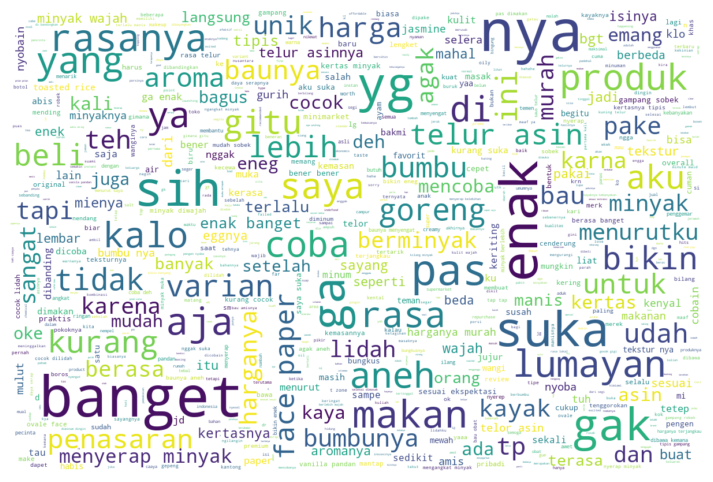

In [115]:
wc = WordCloud(background_color="white", max_words=1000, max_font_size=100, random_state=25,
               width=1200, height=800).generate(''.join(data_clean['review']))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()